In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
s = StandardScaler()
data = s.fit_transform(data)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [13]:
def forward_linear_regression(X_batch, y_batch, weights):
    N = np.dot(X_batch, weights['W'])
    P = N + weights['B']
    loss = np.mean(np.power(y_batch - P, 2))
    forward_info = {
        'X': X_batch,
        'y': y_batch,
        'N': N,
        'P': P
    }
    return forward_info, loss

In [14]:
def loss_gradients(forward_info, weights):

    dLdP = - 2 * (forward_info['y'] - forward_info['P'])

    dPdN = np.ones_like(forward_info['N'])
    dPdB = np.ones_like(weights['B'])

    dNdW = np.transpose(forward_info['X'], (1, 0))

    dLdN = dLdP * dPdN

    dLdW = np.dot(dNdW, dLdN)

    dLdB = (dLdP * dPdB).sum(axis=0)

    gradients = {'W': dLdW, 'B': dLdB}
    return gradients

In [15]:
# init parameters


def init_params(n_in):
    weights = {
        'W': np.random.randn(n_in, 1),
        'B': np.random.randn(1, 1)
    }
    return weights

In [17]:
init_params(8)

{'W': array([[ 1.23061241],
        [-0.96432116],
        [-1.67287652],
        [-1.22122858],
        [-0.46692448],
        [ 0.90260909],
        [ 0.47338781],
        [-0.29552526]]),
 'B': array([[-2.32169085]])}

In [18]:
def permutate_data(X, y):
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]

In [20]:
def generate_batch(X, y, start=0, batch_size=10):
    if start - batch_size > X.shape[0]:
        batch_size = X.shape[0] - start

    X_batch = X[start:start + batch_size]
    y_batch = y[start:start + batch_size]

    return X_batch, y_batch

In [21]:
def train(X,
          y,
          n_iter=1000,
          learning_rate=0.001,
          batch_size=100,
          return_losses=False,
          return_weights=False,
          seed=1):

    if seed:
        np.random.seed(seed)

    start = 0

    weights = init_params(X.shape[1])

    X, y = permutate_data(X, y)

    losses = []

    for i in range(n_iter):

        if start >= X.shape[0]:
            X, y = permutate_data(X, y)
            start = 0

        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size

        forward_info, loss = forward_linear_regression(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)

        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights

    return None

In [23]:
def predict(X, weights):
    N = np.dot(X, weights['W'])
    P = N + weights['B']
    return P

In [24]:
train_info = train(X_train,
                   y_train,
                   n_iter=1000,
                   learning_rate=0.001,
                   batch_size=5,
                   return_losses=True,
                   return_weights=True,
                   seed=180708)


In [25]:
losses = train_info[0]
weights = train_info[1]

In [27]:
weights

{'W': array([[-0.88920353],
        [ 0.35028512],
        [-0.08546877],
        [ 0.80121585],
        [-1.71948149],
        [ 2.79660111],
        [ 0.497616  ],
        [-2.35963593],
        [ 1.23519165],
        [-0.48666074],
        [-2.34551231],
        [ 0.8600063 ],
        [-4.05301597]]),
 'B': array([[22.63232258]])}

In [28]:
preds = predict(X_test, weights)

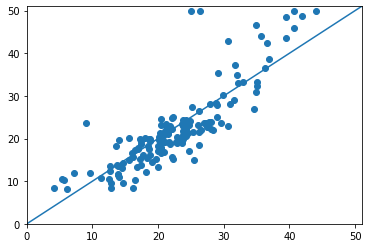

In [31]:
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.show()